In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import torch
import MRzeroCore as mr0
from MRzeroCore.phantom.coil import Coil, CoilLoop
import matplotlib.pyplot as plt


VoxelGridPhantom
size = tensor([0.2000, 0.2000, 0.0080])
Plotting 1st of 32 coil sens maps


/opt/homebrew/Caskroom/miniforge/base/envs/mri_p312/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mri_p312/lib/python3.12/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


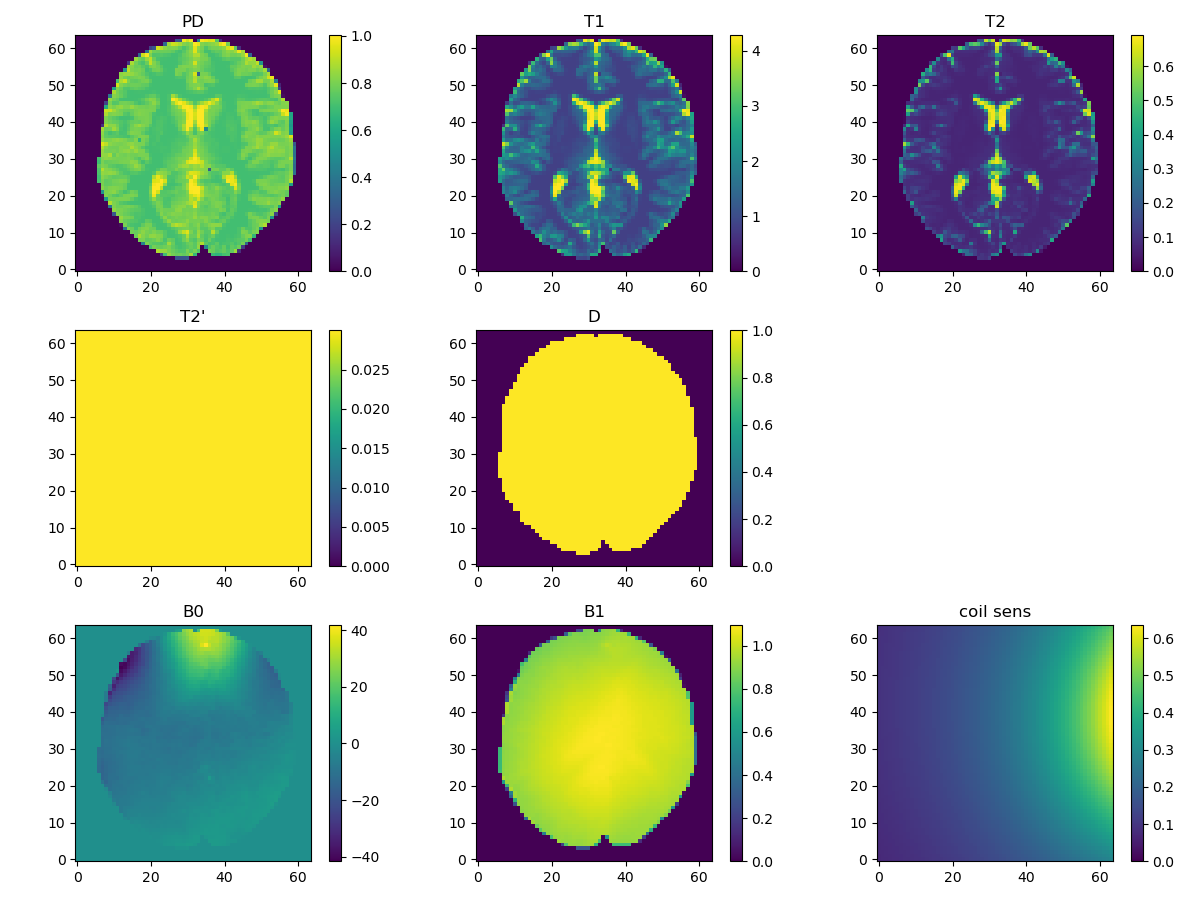

In [2]:
obj_p = mr0.util.load_phantom(size=(64, 64))

obj_p.D[:] = 0
obj_p.D[obj_p.PD > 0] = 1
obj_p.add_coil()

# Store PD and B0 for comparison
D = obj_p.D
B0 = obj_p.B0
obj_p.plot()

# Simulate
obj_p = obj_p.build()

In [3]:
coil = Coil(
    coil_radius=0.12,
    num_channels=32,
    num_rings=4,
    loop_radius=0.04
)

In [4]:
coilsens = coil.get_sensitivity_maps(matrix_size=(64, 64, 1), fov=(0.2, 0.2, 5e-3))

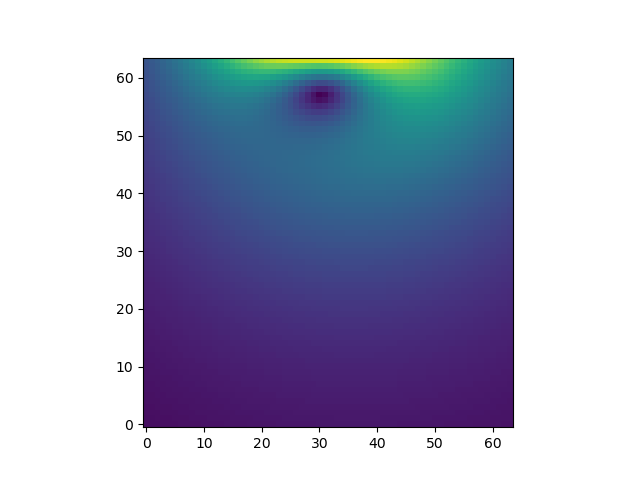

In [5]:
plt.figure()
plt.imshow(torch.abs(coilsens[0, :, :, 0]), origin='lower')

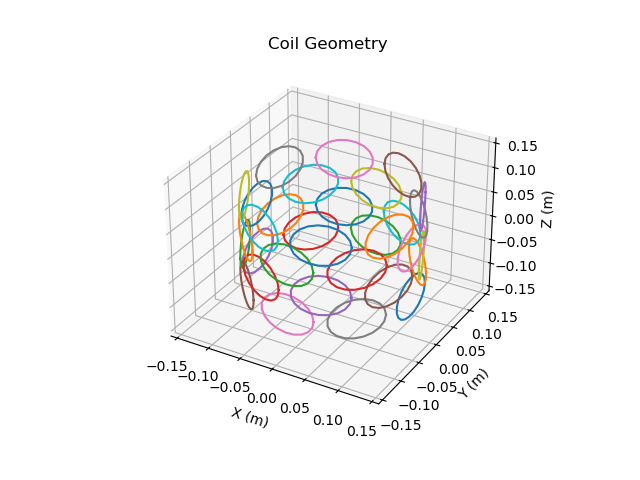

In [6]:
coil.plot_coil_geometry()